# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.1 Contents<a id='3.1_Contents'></a>
* [3 Exploratory Data Analysis](#3_Exploratory_Data_Analysis)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Introduction](#3.2_Introduction)
  * [3.3 Imports](#3.3_Imports)
  * [3.4 Load The Data](#3.4_Load_The_Data)
  * [3.5 Explore The Data](#3.5_Explore_The_Data)
  * [3.6 Cleaning, Transforming, and Visualizing](#3.6_Cleaning_Transforming_And_Visualizing)
    * [3.6.1 Visualizing High Dimensional Data](#3.6.1_Visualizing_High_Dimensional_Data)
      * [3.6.1.1 Scale the data](#3.6.1.1_Scale_the_data)
        * [3.6.1.1.1 Verifying the scaling](#3.6.1.1.1_Verifying_the_scaling)
      * [3.6.1.2 Calculate the PCA transformation](#3.6.1.2_Calculate_the_PCA_transformation)
    * [3.6.2 Visualizing correlations](#3.6.2_Visualizing_correlations)
      * [3.6.2.1 Feature correlation heatmap](#3.6.2.1_Feature_correlation_heatmap)
    * [3.6.3 Boxplots of features against Heart Attack Risk](#3.6.3_Boxplots_of_numeric_features_against_Heart_Attack_Risk)
      * [3.6.3.1 Boxplot Cholestrol vs Age](#3.6.3.1_Boxplot_Cholestrol_vs_Age)
      * [3.6.3.2 Boxplot Cholestrol vs Triglycerides](#3.6.3.2_Boxplot_Cholestrol_vs_Triglycerides)
      * [3.6.3.3 Boxplot Cholestrol vs Systolic](#3.6.3.3_Boxplot_Cholestrol_vs_Systolic)
      * [3.6.3.4 Boxplot Cholestrol vs Exercise](#3.6.3.4_Boxplot_Cholestrol_vs_Exercise)
      * [3.6.3.5 Boxplot Blood Pressure vs Age](#3.6.3.5_Boxplot_BP_vs_Age)
      * [3.6.3.6 Boxplot Blood Pressure vs Triglycerides](#3.6.3.6_Boxplot_BP_vs_Triglycerides)
      * [3.6.3.7 Boxplot Blood Pressure vs Cholesterol](#3.6.3.7_Boxplot_BP_vs_Cholesterol)
      * [3.6.3.8 Boxplot Blood Pressure vs Exercise](#3.6.3.8_Boxplot_BP_vs_Exercise)
  * [3.7 Save data](#3.7_Save_data)
  * [3.8 Summary](#3.8_Summary)

## 3.2 Introduction<a id='3.2_Introduction'></a>

In this step, examine and visualize dataset to gain insights about its characteristics, identify patterns, spot anomalies, and understand relationships between variables before building predictive models, essentially laying the foundation for further analysis by uncovering key trends and potential issues within the data

## 3.3 Imports<a id='3.3_Imports'></a>

In [6]:
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing 
from sklearn.preprocessing import LabelEncoder
import warnings 

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
pd.options.mode.copy_on_write = True

## 3.4 Load The Data<a id='3.4_Load_The_Data'></a>

In [8]:
data = pd.read_csv('../data/processed/heart_attack_prediction_dataset_cleaned.csv')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Blood Pressure                   8763 non-null   object 
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   object 
 12  Previous Heart Probl

In [10]:
data.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic
0,67,Male,208,158/88,72,0,0,1,0,0,...,31.251,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,21,Male,389,165/93,98,1,1,1,1,1,...,27.195,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,21,Female,324,174/99,72,1,0,0,0,0,...,28.177,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,84,Male,383,163/100,73,1,1,1,0,1,...,36.465,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,66,Male,318,91/88,93,1,1,1,1,0,...,21.809,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


## 3.5 Explore The Data<a id='3.5_Explore_The_Data'></a>

In [12]:
# Describe the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8763.0,53.707977,21.249509,18.000,35.0000,54.000,72.0000,90.000
Cholesterol,8763.0,259.877211,80.863276,120.000,192.0000,259.000,330.0000,400.000
Heart Rate,8763.0,75.021682,20.550948,40.000,57.0000,75.000,93.0000,110.000
Diabetes,8763.0,0.652288,0.476271,0.000,0.0000,1.000,1.0000,1.000
Family History,8763.0,0.492982,0.499979,0.000,0.0000,0.000,1.0000,1.000
Smoking,8763.0,0.896839,0.304186,0.000,1.0000,1.000,1.0000,1.000
Obesity,8763.0,0.501426,0.500026,0.000,0.0000,1.000,1.0000,1.000
Alcohol Consumption,8763.0,0.598083,0.490313,0.000,0.0000,1.000,1.0000,1.000
Exercise Hours Per Week,8763.0,10.014284,5.783748,0.002,4.9815,10.070,15.0500,19.999
Previous Heart Problems,8763.0,0.495835,0.500011,0.000,0.0000,0.000,1.0000,1.000


In [13]:
# Get a list of the values of the target variable, and the number of occurrences of each. 
data["Heart Attack Risk"].value_counts()

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64

## 3.6 Cleaning, Transforming, and Visualizing<a id='3.6_Cleaning_Transforming_And_Visualizing'></a>

There are categorical fields. Lets Label Encode for Visualizing

In [16]:
# Create LabelEncoder object
le = LabelEncoder()

# Fit and transform the data
encoded_country = le.fit_transform(data['Country'])
encoded_sex = le.fit_transform(data['Sex'])
encoded_diet = le.fit_transform(data['Diet'])
encoded_continent = le.fit_transform(data['Continent'])
encoded_hemisphere = le.fit_transform(data['Hemisphere'])

In [17]:
data_encoded = data.copy()
data_encoded['Encoded Country'] = encoded_country
data_encoded['Encoded Sex'] = encoded_sex
data_encoded['Encoded Diet'] = encoded_diet
data_encoded['Encoded Continent'] = encoded_continent
data_encoded['Encoded Hemisphere'] = encoded_hemisphere

In [18]:
data_encoded.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic,Encoded Country,Encoded Sex,Encoded Diet,Encoded Continent,Encoded Hemisphere
0,67,Male,208,158/88,72,0,0,1,0,0,...,South America,Southern Hemisphere,0,158,88,0,1,0,5,1
1,21,Male,389,165/93,98,1,1,1,1,1,...,North America,Northern Hemisphere,0,165,93,3,1,2,4,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,Europe,Northern Hemisphere,0,174,99,6,0,1,3,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,North America,Northern Hemisphere,0,163,100,3,1,0,4,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,Asia,Northern Hemisphere,0,91,88,16,1,2,1,0


In [19]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Blood Pressure                   8763 non-null   object 
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   object 
 12  Previous Heart Probl

Encoded columns are added at the end. Lets remove the categorical columns now

In [21]:
columns_to_drop = ['Sex', 'Blood Pressure', 'Diet', 'Country', 'Continent', 'Hemisphere']
data_encoded.drop(columns_to_drop, axis=1, inplace=True)
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Cholesterol                      8763 non-null   int64  
 2   Heart Rate                       8763 non-null   int64  
 3   Diabetes                         8763 non-null   int64  
 4   Family History                   8763 non-null   int64  
 5   Smoking                          8763 non-null   int64  
 6   Obesity                          8763 non-null   int64  
 7   Alcohol Consumption              8763 non-null   int64  
 8   Exercise Hours Per Week          8763 non-null   float64
 9   Previous Heart Problems          8763 non-null   int64  
 10  Medication Use                   8763 non-null   int64  
 11  Stress Level                     8763 non-null   int64  
 12  Sedentary Hours Per 

Rename the columns now

In [23]:
data_encoded.rename(columns={'Encoded Country': 'Country', 
                         'Encoded Sex' : 'Sex',
                         'Encoded Diet': 'Diet',
                            'Encoded Continent': 'Continent',
                            'Encoded Hemisphere': 'Hemisphere',
                           }, inplace=True)

In [24]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Cholesterol                      8763 non-null   int64  
 2   Heart Rate                       8763 non-null   int64  
 3   Diabetes                         8763 non-null   int64  
 4   Family History                   8763 non-null   int64  
 5   Smoking                          8763 non-null   int64  
 6   Obesity                          8763 non-null   int64  
 7   Alcohol Consumption              8763 non-null   int64  
 8   Exercise Hours Per Week          8763 non-null   float64
 9   Previous Heart Problems          8763 non-null   int64  
 10  Medication Use                   8763 non-null   int64  
 11  Stress Level                     8763 non-null   int64  
 12  Sedentary Hours Per 

### 3.6.1 Visualizing High Dimensional Data<a id='3.6.1_Visualizing_High_Dimensional_Data'></a>

The basic steps in this process are:

1. scale the data (important here because our features are heterogenous)
2. fit the PCA transformation (learn the transformation from the data)
3. apply the transformation to the data to create the derived features

#### 3.6.1.1 Scale the data<a id='3.6.1.1_Scale_the_data'></a>

In [28]:
data_scaled = scale(data_encoded)

##### 3.6.1.1.1 Verifying the scaling<a id='3.6.1.1.1_Verifying_the_scaling'></a>

In [30]:
data_scaled_df = pd.DataFrame(data_scaled, columns=data_encoded.columns)
data_scaled_df.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic,Diastolic,Country,Sex,Diet,Continent,Hemisphere
0,0.625557,-0.641579,-0.147042,-1.369651,-0.986061,0.339157,-1.002857,-1.219867,-1.010870,-0.991704,...,-1.528843,-0.514750,-0.74709,0.870044,0.193782,-1.620793,0.658765,-1.225914,1.609515,1.350571
1,-1.539322,1.596895,1.118179,0.730113,1.014136,0.339157,0.997151,0.819762,-1.418069,1.008365,...,-1.090738,-0.011823,-0.74709,1.135714,0.534480,-1.102536,0.658765,1.231804,0.983525,-0.740428
2,-1.539322,0.793023,-0.147042,0.730113,-0.986061,-2.948488,-1.002857,-1.219867,-1.372248,1.008365,...,0.223577,-1.520604,-0.74709,1.477290,0.943319,-0.584279,-1.517992,0.002945,0.357535,-0.740428
3,1.425621,1.522691,-0.098380,0.730113,1.014136,0.339157,-1.002857,0.819762,-0.032210,1.008365,...,-0.214528,-1.520604,-0.74709,1.059809,1.011458,-1.102536,0.658765,-1.225914,0.983525,-0.740428
4,0.578495,0.718820,0.874867,0.730113,1.014136,0.339157,0.997151,-1.219867,-0.727992,1.008365,...,-1.090738,-1.017677,-0.74709,-1.672797,0.193782,1.143245,0.658765,1.231804,-0.894445,-0.740428


In [31]:
data_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   float64
 1   Cholesterol                      8763 non-null   float64
 2   Heart Rate                       8763 non-null   float64
 3   Diabetes                         8763 non-null   float64
 4   Family History                   8763 non-null   float64
 5   Smoking                          8763 non-null   float64
 6   Obesity                          8763 non-null   float64
 7   Alcohol Consumption              8763 non-null   float64
 8   Exercise Hours Per Week          8763 non-null   float64
 9   Previous Heart Problems          8763 non-null   float64
 10  Medication Use                   8763 non-null   float64
 11  Stress Level                     8763 non-null   float64
 12  Sedentary Hours Per 

First of all, check the mean of the scaled features

In [33]:
# Find Mean
data_scaled_df.mean()

Age                               -5.756994e-17
Cholesterol                        5.594825e-17
Heart Rate                         1.763586e-16
Diabetes                          -5.331300e-17
Family History                    -9.152403e-17
Smoking                            1.465601e-16
Obesity                            9.121997e-17
Alcohol Consumption                1.392625e-16
Exercise Hours Per Week            2.010894e-16
Previous Heart Problems            4.601541e-17
Medication Use                     1.402760e-16
Stress Level                      -6.324584e-17
Sedentary Hours Per Day           -1.840616e-16
Income                             1.652095e-16
BMI                               -2.992015e-16
Triglycerides                     -5.716451e-17
Physical Activity Days Per Week   -2.594701e-17
Sleep Hours Per Day               -1.824399e-16
Heart Attack Risk                  1.297351e-17
Systolic                           3.304190e-16
Diastolic                         -3.133

Mean is almost zero

Perform a similar check for the standard deviation

In [36]:
#Find standard deviation
data_scaled_df.std()

Age                                1.000057
Cholesterol                        1.000057
Heart Rate                         1.000057
Diabetes                           1.000057
Family History                     1.000057
Smoking                            1.000057
Obesity                            1.000057
Alcohol Consumption                1.000057
Exercise Hours Per Week            1.000057
Previous Heart Problems            1.000057
Medication Use                     1.000057
Stress Level                       1.000057
Sedentary Hours Per Day            1.000057
Income                             1.000057
BMI                                1.000057
Triglycerides                      1.000057
Physical Activity Days Per Week    1.000057
Sleep Hours Per Day                1.000057
Heart Attack Risk                  1.000057
Systolic                           1.000057
Diastolic                          1.000057
Country                            1.000057
Sex                             

The numbers should be closer to 1 than this. Lets do with ddoff=0

In [38]:
data_scaled_df.std(ddof=0)

Age                                1.0
Cholesterol                        1.0
Heart Rate                         1.0
Diabetes                           1.0
Family History                     1.0
Smoking                            1.0
Obesity                            1.0
Alcohol Consumption                1.0
Exercise Hours Per Week            1.0
Previous Heart Problems            1.0
Medication Use                     1.0
Stress Level                       1.0
Sedentary Hours Per Day            1.0
Income                             1.0
BMI                                1.0
Triglycerides                      1.0
Physical Activity Days Per Week    1.0
Sleep Hours Per Day                1.0
Heart Attack Risk                  1.0
Systolic                           1.0
Diastolic                          1.0
Country                            1.0
Sex                                1.0
Diet                               1.0
Continent                          1.0
Hemisphere               

This agrees with the expectation.

#### 3.6.1.2 Calculate the PCA transformation<a id='3.5.3.2_Calculate_the_PCA_transformation'></a>

Fit the PCA transformation using the scaled data.

In [42]:
data_pca = PCA().fit(data_scaled_df)
data_pca.explained_variance_ratio_.cumsum()

array([0.06499401, 0.12749546, 0.16915531, 0.21030175, 0.25100033,
       0.29124655, 0.33130768, 0.37097163, 0.41049039, 0.44980817,
       0.48870293, 0.52723326, 0.56555232, 0.60367914, 0.64154598,
       0.67924877, 0.71690484, 0.75413367, 0.79078979, 0.82716253,
       0.86330784, 0.89934957, 0.93470415, 0.96525857, 0.98616915,
       1.        ])

Plot the cumulative variance ratio with number of components.

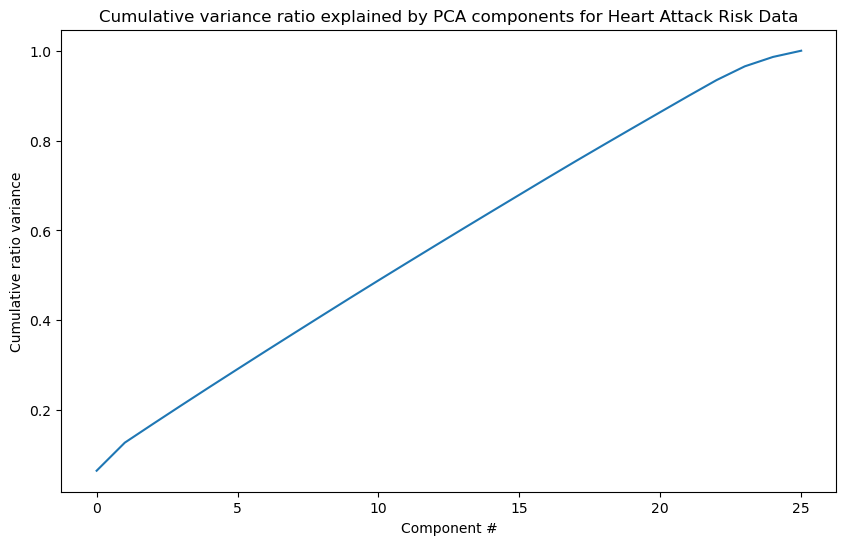

In [44]:
plt.subplots(figsize=(10, 6))
plt.plot(data_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for Heart Attack Risk Data');

This shows First component 'Age' 15% of Variance. About 80% of Variance is from first 15 Components

### 3.6.2 Visualizing correlations<a id='3.6.2_Visualizing_correlations'></a>

In [47]:
# Use dataframe corr to check the correlation
data_encoded.corr()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic,Diastolic,Country,Sex,Diet,Continent,Hemisphere
Age,1.000000,-0.009107,-0.003844,-0.014105,0.008353,0.394891,-0.008140,-0.006666,0.001206,0.000868,...,0.001384,-0.002185,0.006403,0.003070,-0.009826,0.002567,0.020067,0.002104,-0.010387,-0.002795
Cholesterol,-0.009107,1.000000,0.000315,-0.013428,-0.021608,0.016342,-0.014843,-0.007261,0.021517,-0.006070,...,0.016056,0.004456,0.019340,0.000133,0.002083,0.012962,0.007614,0.003582,0.008892,-0.019462
Heart Rate,-0.003844,0.000315,1.000000,0.006764,-0.013470,-0.012331,0.012725,0.003459,0.008277,-0.004956,...,0.000834,0.001811,-0.004251,0.008482,-0.018113,-0.016436,-0.010921,-0.016409,0.000975,0.010145
Diabetes,-0.014105,-0.013428,0.006764,1.000000,-0.013844,0.000527,0.012866,0.005551,-0.007014,0.000867,...,-0.002411,-0.012457,0.017225,-0.005306,-0.000512,0.011031,0.003582,-0.001561,-0.002445,0.001478
Family History,0.008353,-0.021608,-0.013470,-0.013844,1.000000,0.011748,-0.001444,0.012701,-0.006378,-0.004568,...,0.009561,-0.011199,-0.001652,-0.009762,0.017818,-0.003194,0.002180,0.012721,0.006055,-0.004163
Smoking,0.394891,0.016342,-0.012331,0.000527,0.011748,1.000000,0.003969,0.012754,-0.000150,-0.000574,...,-0.006465,-0.005424,-0.004051,-0.009534,-0.012293,0.021095,0.514837,-0.012986,-0.013697,0.002439
Obesity,-0.008140,-0.014843,0.012725,0.012866,-0.001444,0.003969,1.000000,-0.024195,0.002098,0.005159,...,0.005337,-0.005314,-0.013318,-0.001918,-0.020574,-0.009631,0.002376,-0.008546,0.001377,-0.008555
Alcohol Consumption,-0.006666,-0.007261,0.003459,0.005551,0.012701,0.012754,-0.024195,1.000000,-0.008514,0.010395,...,0.001593,-0.000843,-0.013778,0.010764,-0.007282,0.013029,0.002085,-0.000698,0.005013,-0.012095
Exercise Hours Per Week,0.001206,0.021517,0.008277,-0.007014,-0.006378,-0.000150,0.002098,-0.008514,1.000000,0.005253,...,0.007725,-0.001245,0.011133,-0.009506,-0.003470,0.005799,-0.006976,0.002653,-0.002927,-0.007485
Previous Heart Problems,0.000868,-0.006070,-0.004956,0.000867,-0.004568,-0.000574,0.005159,0.010395,0.005253,1.000000,...,0.008537,0.004460,0.000274,-0.011926,0.008813,0.001871,0.001964,-0.013347,0.021525,0.017384


#### 3.6.2.1 Feature correlation heatmap<a id='3.6.1.1_Feature_correlation_heatmap'></a>

<Axes: >

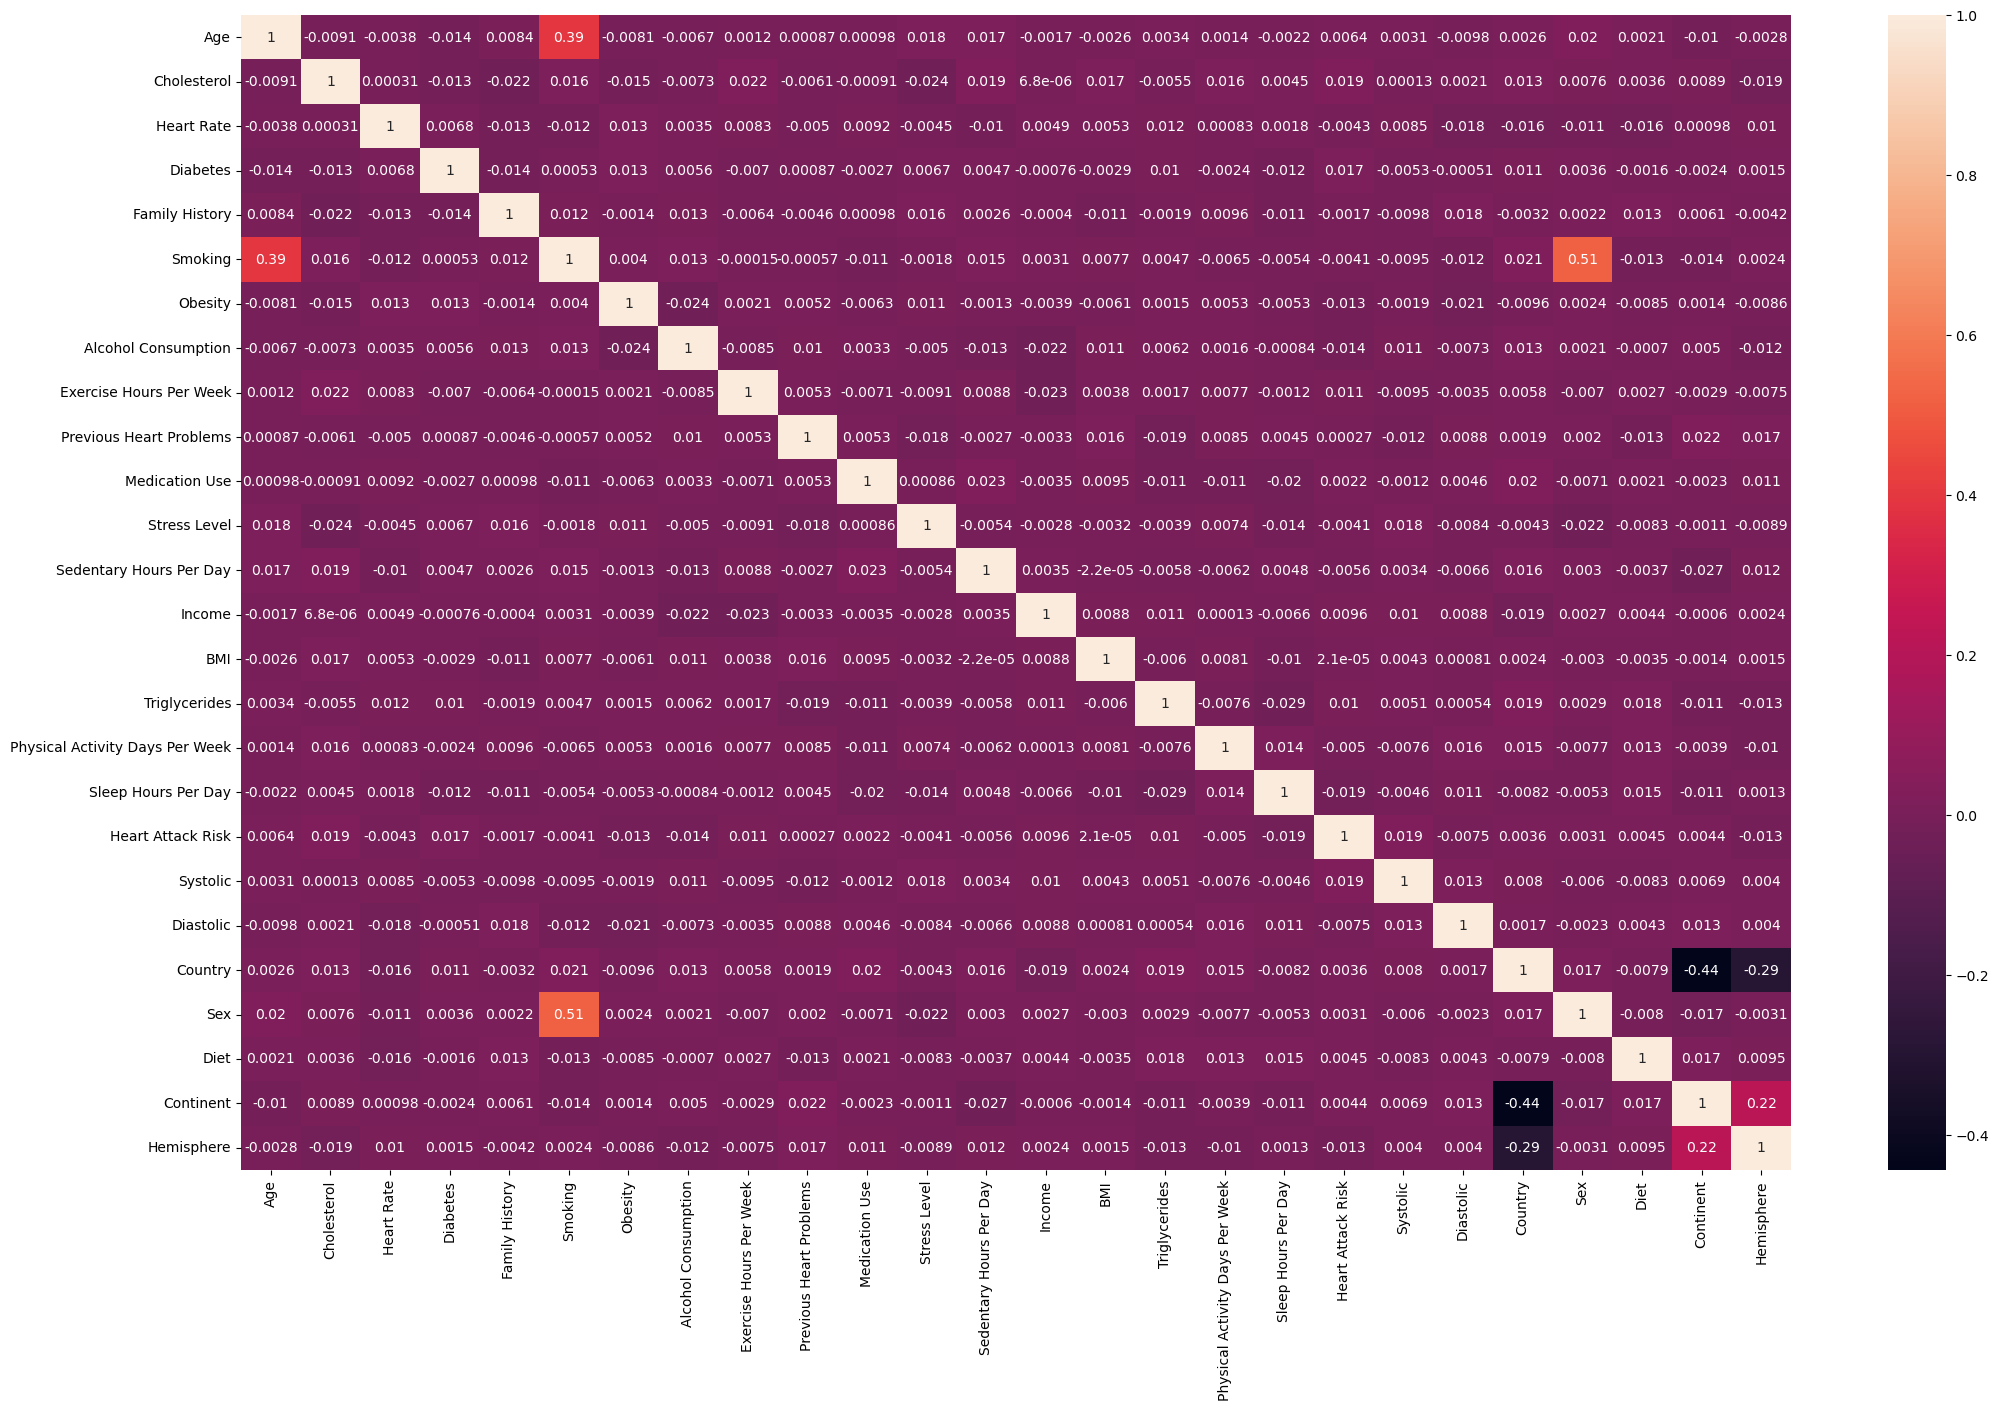

In [49]:
# Make a heatmap of the data 
plt.figure(figsize=(25,15))
sns.heatmap(data_encoded.corr(), annot=True)

***These features shows Positive Correlations with the target feature 'Heart Attack Risk'***

* Cholesterol
* Diabetes
* Exercise Hours Per Week
* Triglycerides
* Systolic
* Age
* Previous Heart Problems
* Medication Use
* Income
* Country
* Sex
* Diet
* Continent

This almost matches with what we saw in PCA

In [51]:
# positive correlation - Age 0.0064, , Previous Heart Problems 0.00027, 
# Strong Cholestrol 0.019, Diabetes 0.017, Exercise Hours Per Week 0.011, Triglycerides 0.01, Systolic 0.019
# Less Strong Medication Use 0.0022, Income 0.0096, BMI 0.000021, Country 0.0036, Sex 0.0031, Diet 0.0045, Continent 0.0044
# Negative correlation - Heart Rate, Family History, Smoking, Obesity, Alcohol Consumption, Stress Level, Sedentary Hours Per Day
# Physical Activity Days Per Week, Sleep Hours Per Day, Diastolic, Hemisphere 

Lets check which of these features has strong correlation

In [53]:
positive_corr_cols = ["Cholesterol", "Diabetes", "Exercise Hours Per Week", "Triglycerides", "Systolic", "Age", 
                      "Previous Heart Problems", "Medication Use", "Income", "Country", 
                      "Sex", "Diet", "Continent"]

data_positive_corr = data_encoded[positive_corr_cols]

In [54]:
data_positive_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Cholesterol              8763 non-null   int64  
 1   Diabetes                 8763 non-null   int64  
 2   Exercise Hours Per Week  8763 non-null   float64
 3   Triglycerides            8763 non-null   int64  
 4   Systolic                 8763 non-null   int64  
 5   Age                      8763 non-null   int64  
 6   Previous Heart Problems  8763 non-null   int64  
 7   Medication Use           8763 non-null   int64  
 8   Income                   8763 non-null   int64  
 9   Country                  8763 non-null   int32  
 10  Sex                      8763 non-null   int32  
 11  Diet                     8763 non-null   int32  
 12  Continent                8763 non-null   int32  
dtypes: float64(1), int32(4), int64(8)
memory usage: 753.2 KB


<Axes: >

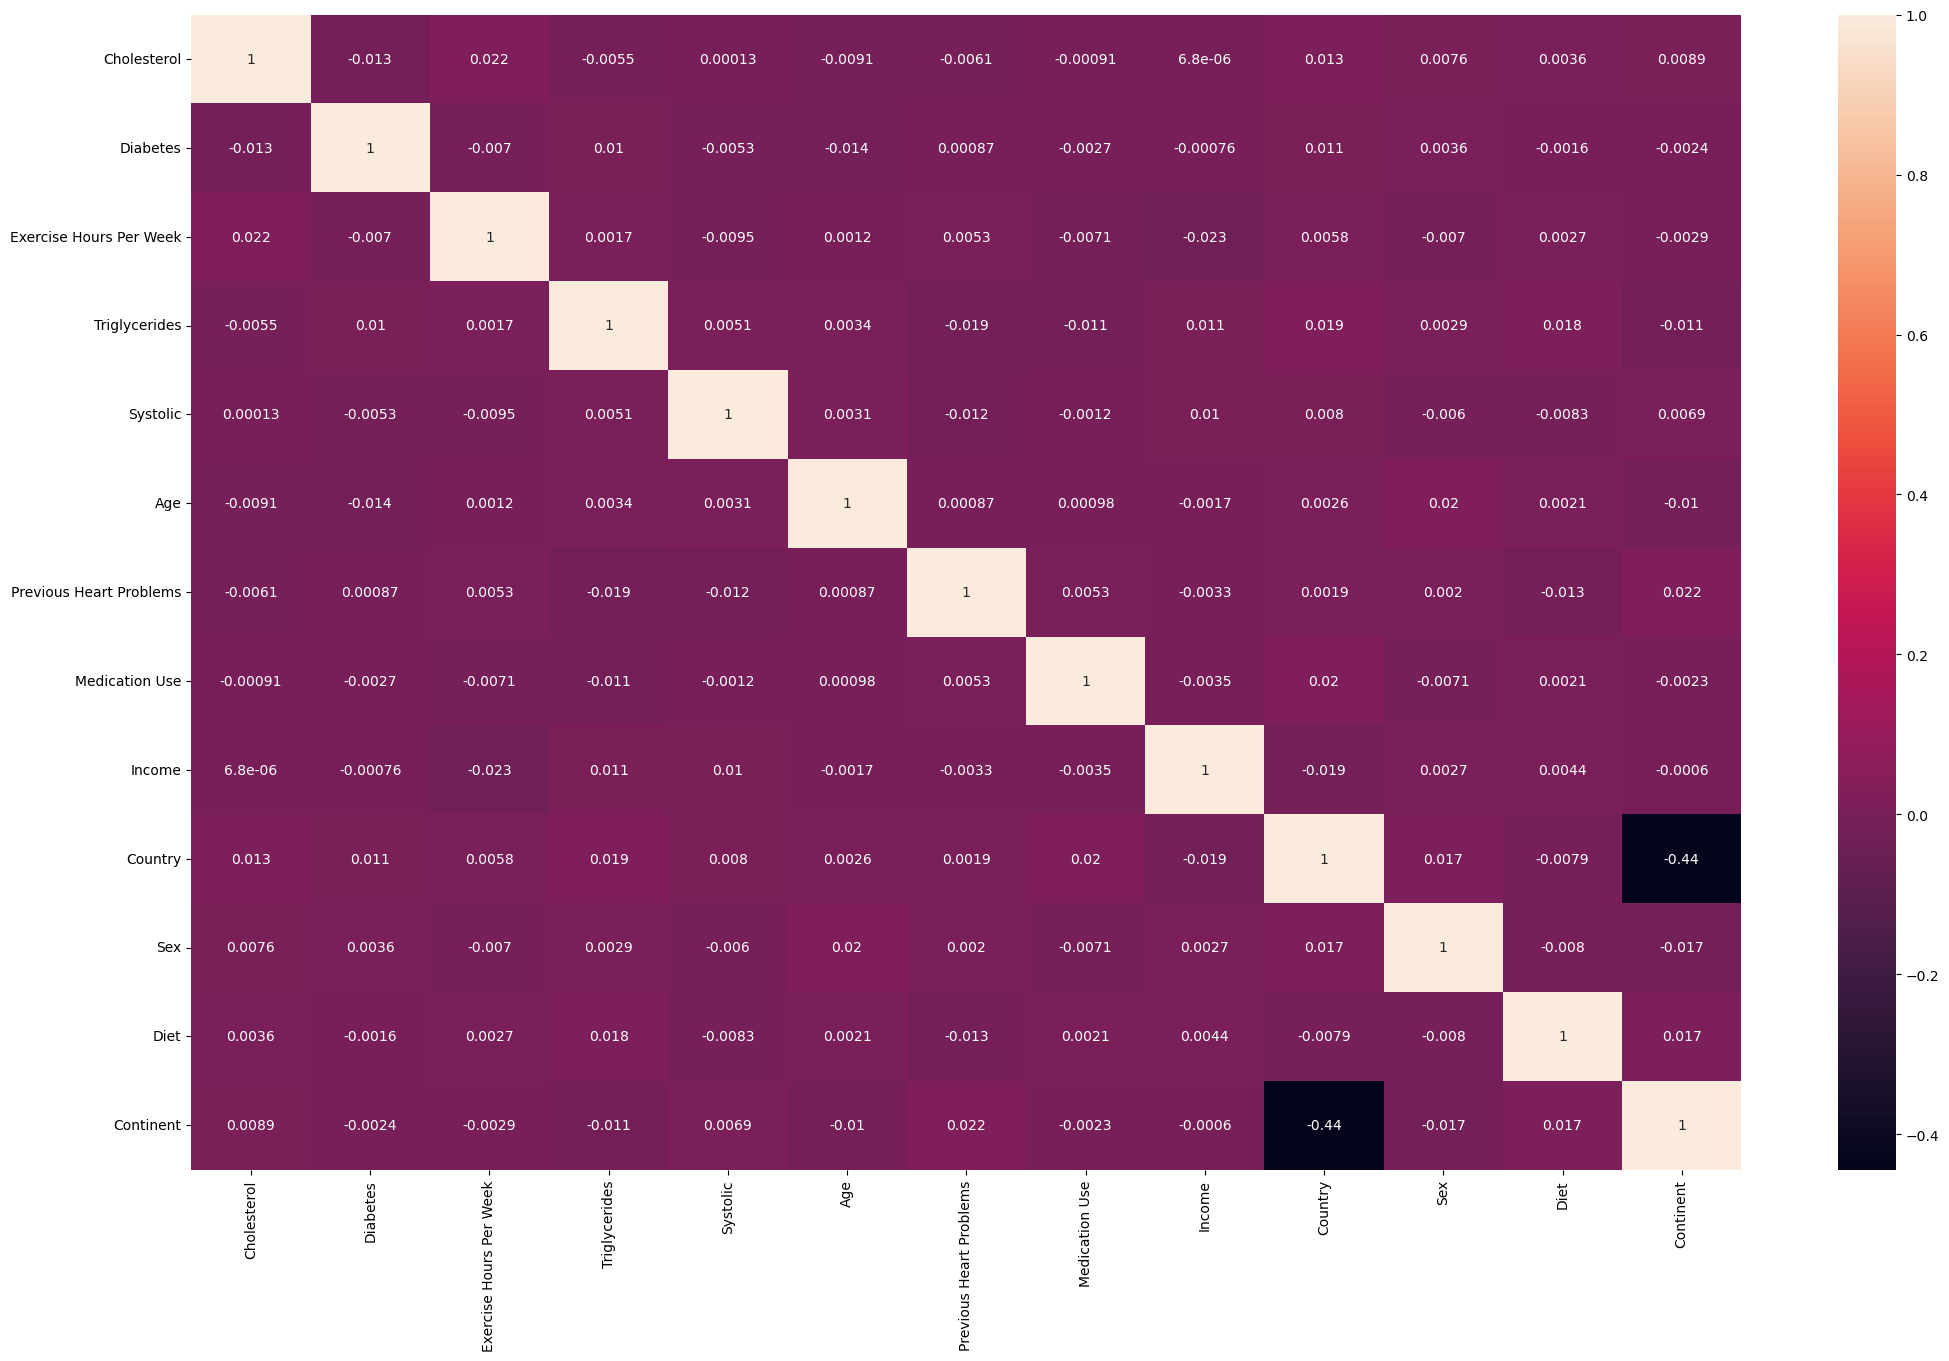

In [55]:
plt.figure(figsize=(25,15))
sns.heatmap(data_positive_corr.corr(), annot=True)

***This narrows down to these features with strong Positive Correlations***

* Cholesterol
* Diabetes
* Exercise Hours Per Week
* Triglycerides
* Systolic
* Age
* Previous Heart Problems
* Medication Use


In [57]:
feature_values = ["Cholesterol", "Diabetes", "Exercise Hours Per Week", "Triglycerides", "Systolic", "Age", 
                      "Previous Heart Problems", "Medication Use", "Heart Attack Risk"]

data_with_selected_features = data[feature_values]

In [58]:
data_with_selected_features.head()

,Cholesterol,Diabetes,Exercise Hours Per Week,Triglycerides,Systolic,Age,Previous Heart Problems,Medication Use,Heart Attack Risk
0,208,0,4.168,286,158,67,0,0,0
1,389,1,1.813,235,165,21,1,0,0
2,324,1,2.078,587,174,21,1,1,0
3,383,1,9.828,378,163,84,1,0,0
4,318,1,5.804,231,91,66,1,0,0


***For visualization, map Cholesterol values to categories***

* Health Health - < 200
* At Risk - Between 200 and 240 
* Dangerous - > 240

In [60]:
data_with_selected_features.loc[:, 'Cholesterol Level'] = data_with_selected_features["Cholesterol"].astype(str)

In [61]:
data_with_selected_features.loc[data_with_selected_features['Cholesterol'] < 200, 'Cholesterol Level'] = 'Hearty Health'
data_with_selected_features.loc[(data_with_selected_features['Cholesterol'] >= 200) & (data_with_selected_features['Cholesterol'] < 240), 'Cholesterol Level'] = 'At Risk'
data_with_selected_features.loc[data_with_selected_features['Cholesterol'] >= 240, 'Cholesterol Level'] = 'Dangerous'

***Do same for Blood Pressure***

* Healthy - Systolic < 120
* Elevated - Systolic Between 120 and 130 
* Stage 1 Hypertension - Systolic Between 130 and 140 
* Stage 2 Hypertension - Systolic Between 140 and 180 
* Hypertension Crisis - Systolic >= 180

In [63]:
data_with_selected_features.loc[:, 'Blood Pressure'] = data_with_selected_features['Systolic'].astype(str)

In [64]:
data_with_selected_features.loc[data_with_selected_features['Systolic'] < 120, 'Blood Pressure'] = 'Healthy'
data_with_selected_features.loc[(data_with_selected_features['Systolic'] >= 120) & (data_with_selected_features['Systolic'] < 130), 'Blood Pressure'] = 'Elevated'
data_with_selected_features.loc[(data_with_selected_features['Systolic'] >= 130) & (data_with_selected_features['Systolic'] < 140), 'Blood Pressure'] = 'Stage 1 Hypertension'
data_with_selected_features.loc[(data_with_selected_features['Systolic'] >= 140) & (data_with_selected_features['Systolic'] < 180), 'Blood Pressure'] = 'Stage 2 Hypertension'
data_with_selected_features.loc[data_with_selected_features['Systolic'] >= 180, 'Blood Pressure'] = 'Hypertension Crisis'

In [65]:
data_with_selected_features.head()

,Cholesterol,Diabetes,Exercise Hours Per Week,Triglycerides,Systolic,Age,Previous Heart Problems,Medication Use,Heart Attack Risk,Cholesterol Level,Blood Pressure
0,208,0,4.168,286,158,67,0,0,0,At Risk,Stage 2 Hypertension
1,389,1,1.813,235,165,21,1,0,0,Dangerous,Stage 2 Hypertension
2,324,1,2.078,587,174,21,1,1,0,Dangerous,Stage 2 Hypertension
3,383,1,9.828,378,163,84,1,0,0,Dangerous,Stage 2 Hypertension
4,318,1,5.804,231,91,66,1,0,0,Dangerous,Healthy


### 3.6.3 Boxplots of features against Heart Attack Risk<a id='3.6.3_Boxplots_of_numeric_features_against_Heart_Attack_Risk'></a>

In [67]:
def draw_box_plot(xcol, ycol):
    plt.figure(figsize= (5, 5))
    sns.set_theme(style="ticks", palette="pastel")
    ax = sns.boxplot(x=xcol, y=ycol,  hue="Heart Attack Risk",
                 palette="pastel", data=data_with_selected_features)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    sns.despine(offset=1, trim=True) 
    plt.xticks(rotation=45)

##### 3.6.3.1 Boxplot Cholestrol vs Age<a id='3.6.3.1_Boxplot_Cholestrol_vs_Age'></a>

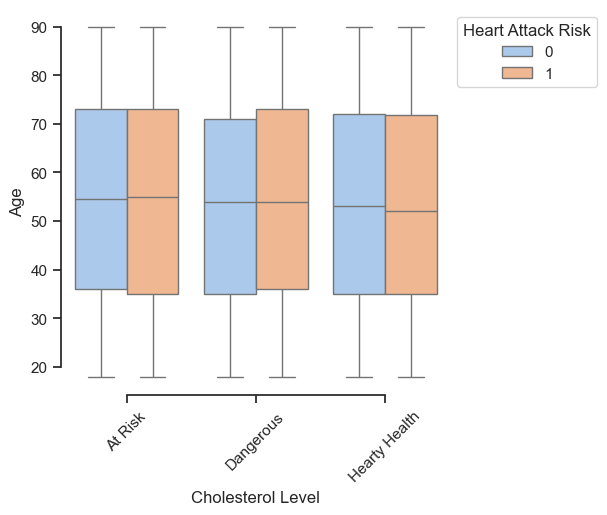

In [69]:
draw_box_plot("Cholesterol Level", "Age")

This shows older patients with cholestrol has more chances for heart attack 

##### 3.6.3.2 Boxplot Cholestrol vs Triglycerides<a id='3.6.3.2_Boxplot_Cholestrol_vs_Triglycerides'></a>

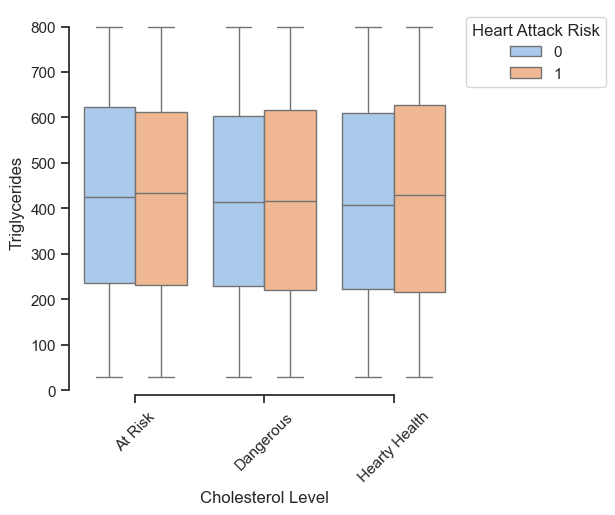

In [72]:
draw_box_plot("Cholesterol Level", "Triglycerides")

This does not tell any clear picture on whether patients with cholestrol and tryglicerides has chances for heart attack

##### 3.6.3.3 Boxplot Cholestrol vs Systolic<a id='3.6.3.3_Boxplot_Cholestrol_vs_Systolic'></a>

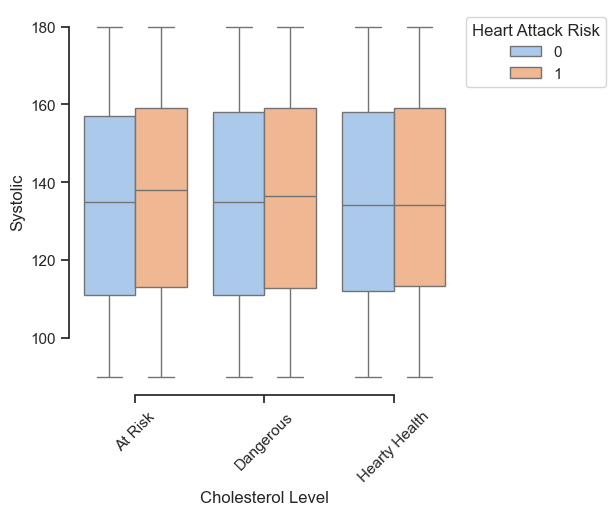

In [75]:
draw_box_plot("Cholesterol Level", "Systolic")

This shows patients with cholestrol and blood pressure has more chances for heart attack 

##### 3.6.3.4 Boxplot Cholestrol vs Exercise<a id='3.6.3.4_Boxplot_Cholestrol_vs_Exercise'></a>

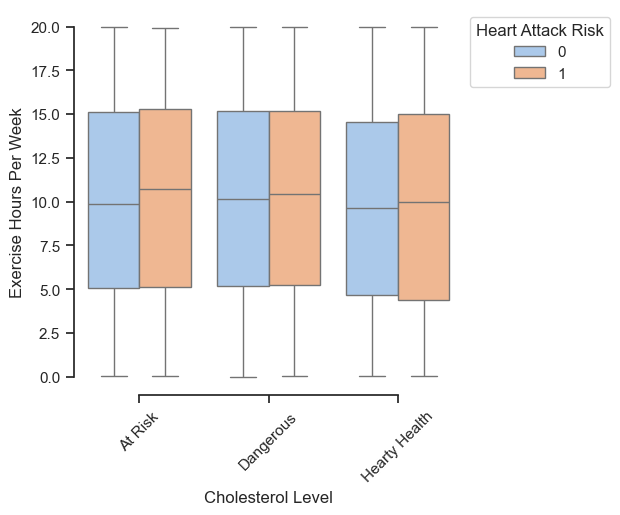

In [78]:
draw_box_plot("Cholesterol Level", "Exercise Hours Per Week")

This does not tell any clear picture on whether patients with cholestrol who does exercises has chances for heart attack

##### 3.6.3.5 Boxplot Blood Pressure vs Age<a id='3.6.3.5_Boxplot_BP_vs_Age'></a>

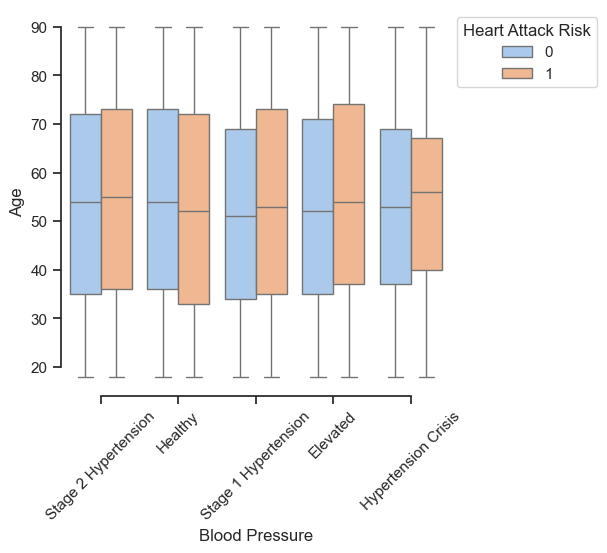

In [81]:
draw_box_plot("Blood Pressure", "Age")

This shows older patients with Blood Pressure has more chances for heart attack 

##### 3.6.3.6 Boxplot Blood Pressure vs Triglycerides<a id='3.6.3.6_Boxplot_BP_vs_Triglycerides'></a>

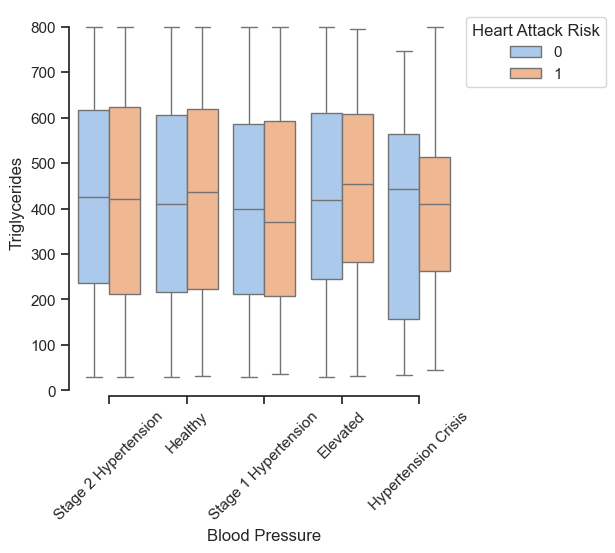

In [84]:
draw_box_plot("Blood Pressure", "Triglycerides")

This does not tell any clear picture on whether patients with Blood Pressure and tryglicerides has chances for heart attack

##### 3.6.3.7 Boxplot Blood Pressure vs Cholesterol<a id='3.6.3.7_Boxplot_BP_vs_Cholesterol'></a>

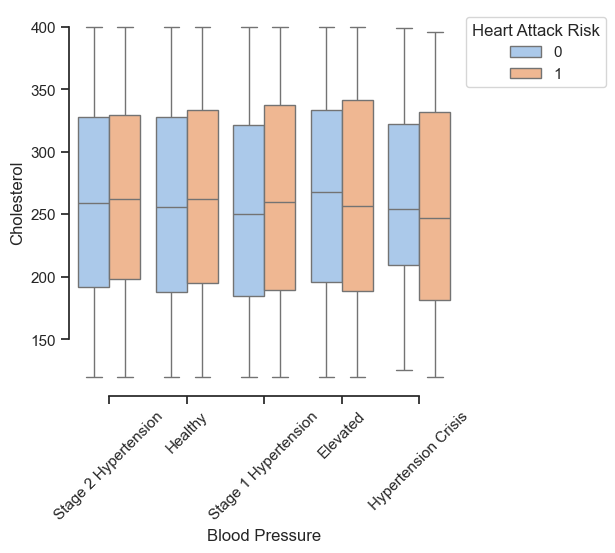

In [87]:
draw_box_plot("Blood Pressure", "Cholesterol")

This does not tell any clear picture on whether patients with Blood Pressure and Cholestrol has chances for heart attack

##### 3.6.3.8 Boxplot Blood Pressure vs Exercise<a id='3.6.3.8 Boxplot_BP_vs_Exercise'></a>

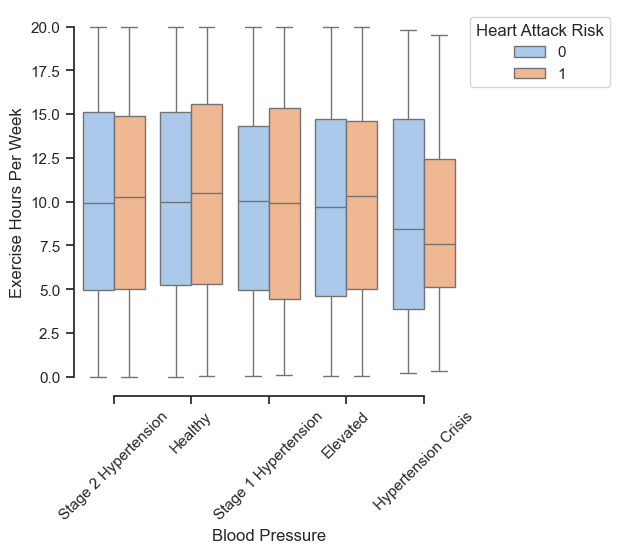

In [90]:
draw_box_plot("Blood Pressure", "Exercise Hours Per Week")

This does not tell any clear picture on whether patients with Blood Pressure who does exercises has chances for heart attack

## 3.7 Save data<a id='3.7_Save_data'></a>

Save selected features

In [94]:
data_with_selected_features.to_csv('../data/processed/heart_attack_prediction_dataset_selected_features.csv', index=False)

## 3.8 Summary<a id='3.8_Summary'></a>

As part of exploratory data analysis, identified top features which has more correlation with heart attack risk which we can use to test/train the model in coming steps.

**Key Findings**

* Heart Attack risk has highest correlation with 
    * Cholesterol
    * Diabetes
    * Exercise Hours Per Week
    * Triglycerides
    * Systolic
    * Age
    * Previous Heart Problems
    * Medication Use
* Older patients with cholestrol has more chances for heart attack 
* Patients with cholestrol and blood pressure has more chances for heart attack 
* Older patients with Blood Pressure has more chances for heart attack 
* Alcohol Consumption has no stronger link with Heart Attack Risk
* Smoking is not a major cause of Heart Attack